# N-gram 语言模型
N-Gram是大词汇连续语音识别中常用的一种语言模型，对中文而言，我们称之为汉语语言模型(CLM, Chinese Language Model)。汉语语言模型利用上下文中相邻词间的搭配信息，可以实现到汉字的自动转换。该模型基于这样一种假设，第N个词的出现只与前面N-1个词相关，而与其它任何词都不相关，整句的概率就是各个词出现概率的乘积。这些概率可以通过直接从语料中统计N个词同时出现的次数得到。常用的是二元的Bi-Gram和三元的Tri-Gram。
## 香农游戏
给定前n-1个词(或字母)，预测下一个词(字母)；  
从训练语料库中确定不同的词序列概率。

### 1.语言模型
假设一个句子S可以表示为一个序列$S=w_1w_2\cdots w_n$,语言模型就是要求句子S的概率P(S):
$$p(S)=\prod_{i=1}^n p(w_i|w_1w_2\cdots w_{i-1})$$
联合概率链式规则虽然考虑到了所有词与词之间的依赖关系，但是非常复杂。实际中几乎无法使用。且这个概率的计算量太大。于是就有了N-gram语言模型来近似这个公式，效果又要比独立性假设好。  
### 2.马尔可夫模型
此时出现马尔可夫模型，该模型假设，一个词的出现仅仅依赖于它前面出现的一个或几个词，这就大大简化了上述公式。  
$$p(w_i|w_1w_2\cdots w_{i-1})=p(w_i|w_{i-n+1}\cdots w_{i-1})$$
#### 2.1 一元语法模型 unigram
假设一个词的出现与其他任何词都无关(满足独立性假设）
$$p(S)=p(w_1,w_2,\cdots, w_n）=\prod_{i=1}^n p(w_i)$$
#### 2.2 二元模型 bigram
假设下一个词的出现依赖于它前面的一个词
$$p(S)=p(w_1,w_2,\cdots, w_n）=\prod_{i=1}^n p(w_i|w_{i-1})$$
#### 2.3 三元模型 trigram
假设下一个词的出现依赖于它前面的两个词
$$p(S)=p(w_1,w_2,\cdots, w_n）=\prod_{i=1}^n p(w_i|w_{i-2}w_{i-1})$$

接下来可以利用最大似然法来求出一组参数，使得训练样本的概率取得最大值。  
对于unigram model而言，其中$c(w_1,\cdots,w_n)$表示n-gram $w_1,\cdots,w_n$在训练语料中出现的次数，M是语料库中的总字数。  
$$p(w_i)=\dfrac{c(w_i)}{M}$$
对于bigram而言，$$p(w_i|w_{i-1})=\dfrac{c(w_{i-1}w_i)}{c(w_{i-1})}$$
对于trigram而言，$$p(w_i|w_{i-2}w_{i-1})=\dfrac{c(w_{i-2}w_{i-1}w_i)}{c(w_{i-2}w_{i-1})}$$
对于n-gram model而言，
$$p(w_i|w_{i-2}w_{i-1})=\dfrac{c(w_{i-2}w_{i-1}w_i)}{c(w_{i-2}w_{i-1})}$$

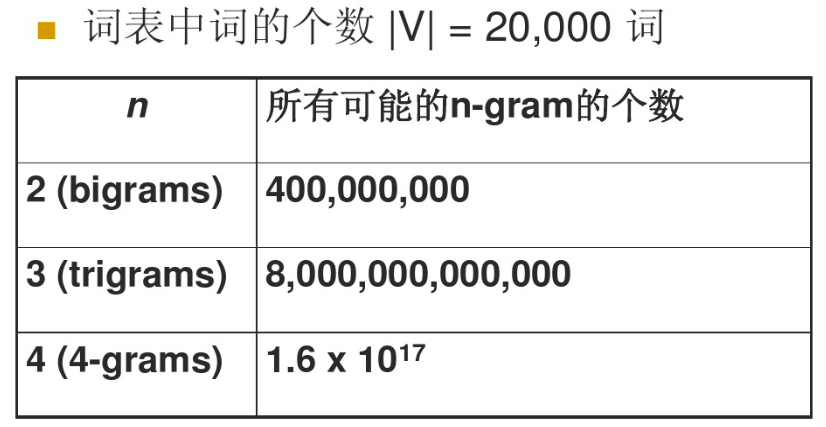

In [1]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/2.png")

### 联合分布分析
如果你想根据一个词在文档中跟其它每个词的相对位置来衡量一个缺失的单词的联合概率分布，你觉得你需要衡量多少个概率？我们假设这个文档有m个单词。  
#### 理解：
缺失的词的位置的可能性为m，这个位置的可能性是绝对的，也就是说这个missing word是文档中的第一个，第二个，...，或者第m个词。有没有一样的词影响的是missing word的相对位置，即便有相同的词，但是相对位置也是不一样的，所以答案为m^2.

### 如何选择依赖词的个数“n”？
选择依赖词的个数'n'主要与计算条件概率有关。理论上，只要有足够大的语料，n越大越好，因为包含的信息多。但实际情况往往是训练语料很有限，很容易产生数据稀疏，不满足大数定律，会导致0概率事件。  
另一方面，如果n很大，参数空间过大，产生维数灾难，也无法使用。比如，词表中词的个数为2000，那么n-gram模型的参数数量为2000^n。参数太多，内存无法存放。  
#### 经验上来看：
trigram用的最多，但原则上，能用bigram解决，则不使用trigram, $n\ge 4$的情况较少。  
当n更大时，对下一个词出现的约束信息更多，具有更大的辨别力；当n更小时，在训练语料库中出现的次数更多，具有更可靠的统计信息，更加实用。

### 3.使用N-gram模型时的数据平滑算法
有研究人员用150万词的训练语料来训练trigram模型，然后用同样来源的测试语料来做验证。结果发现有23%的trigram没有在训练语料中出现过。这就意味着我们计算的一些概率有空为0，这就导致了数据稀疏的可能性。对语言而言，由于数据稀疏的存在，极大似然不是一种很好的估计办法。
数据平滑的目的有两个：一个是使所有的N-gram概率之和为1，二是使所有的N-gram概率都不为0.
#### 3.1 数据稀疏问题
假设我们使用trigram模型
$$p(S)=\prod_{i=1}^np(w_i|w_{i-2}w_{i-1})$$
如果某个$p(w_i|w_{i-2}w_{i-1})=\dfrac{c(w_{i-2}w_{i-1}w_i)}{c(w_{i-2}w_{i-1})}=0$, 那么p(S)=0。  
必须保证$c\neq 0$,从而使 $p\neq0$

#### 3.2 平滑(Smoothing)
平滑技术或者折扣(discounting)方法，其主要策略是把训练样本中出现过的事件的概率适当减小，然后把减小得到的概率密度分配给训练语料中没有出现过的事件。实际中平滑算法有很多种，例如：  
##### 3.2.1 Laplacian smoothing  
这是最古老的一种平滑方法，又称加一平滑法，其保证每个n-gram在训练语料中至少出现1次。以trigram为例，公式如下：
$$p(w_i|w_{i-2}w_{i-1})=\dfrac{c(w_{i-2}w_{i-1}w_i)+1}{c(w_{i-2}w_{i-1})}$$
Add-k smoothing  
Jelinek-Mercer interpolation  
Katz backoff  
Absolute discounting   
Kneser-Ney

### 4. N-gram应用
#### 4.1搜索引擎
搜索引擎(Google或者Baidu)、或者输入法的猜想或者提示。你在用百度时，输入一个或几个词，搜索框通常会以下拉菜单的形式给出几个备选，这些备选其实是在猜想你想要搜索的那个词串。再者，当你用输入法输入一个汉字时，输入法通常可以联系出一个完整的词，例如，我输入一个‘刘’，输入法通常会提示我是否要输入‘刘备’。这些其实都是以N-gram模型为基础来实现的。
#### 4.2 机器翻译和语音识别
机器翻译和语音识别是非常复杂的过程，N-gram语言模型只是其中的一部分，但是缺少它整个过程进行不下去。